In [1]:
import numpy as np
import matplotlib.pyplot as plt

hi = 80.0
hf = 10.0
D = 3.175

ti = 0.0
tf = 10000.0
dt = 5.0

U = 0.01 # 

OutputInterval = 1000.0

Nt = (tf - ti)/dt + 1

Noutput = (tf - ti)/OutputInterval + 1

xMax = yMax = 500.0
xMin = yMin = 0.0
Nx = Ny = 50

x = np.linspace(xMin,xMax,Nx)
y = np.linspace(yMin,yMax,Ny)

dx = x[1] - x[0]
dy = y[1] - y[0]

X, Y = np.meshgrid(x,y)

## Plot the X and Y grid meshes

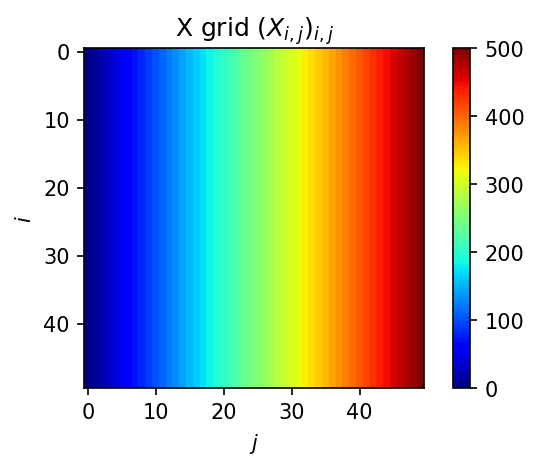

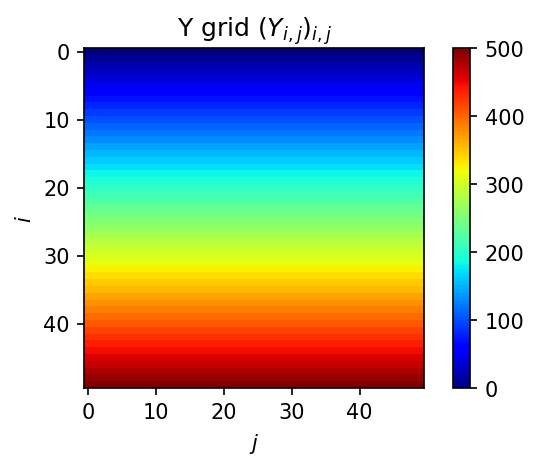

In [2]:
# Plot X grid
plt.figure(1,figsize=(5,3), dpi=150)
plt.title("X grid $(X_{i,j})_{i,j}$")
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.imshow(X,cmap="jet")
plt.colorbar()
plt.show()

# Plot Y grid
plt.figure(2,figsize=(5,3), dpi=150)
plt.title("Y grid $(Y_{i,j})_{i,j}$")
plt.xlabel(r"$j$")
plt.ylabel(r"$i$")
plt.imshow(Y,cmap="jet")
plt.colorbar()
plt.show()


## Compute the stability variable 

In [3]:
alpha = D*dt/dx**2
print("alpha = ",alpha)
print("dt = ",dt)
print("dx = ",dx)
if alpha >= 0.5:
    raise Exception("Stability criteria error! Either decrease dt or increase dx!")

alpha =  0.1524635
dt =  5.0
dx =  10.204081632653061


## Set up the solver matrix 


<img src="img/100sChart.png" style="width: 600px;"/>

<img src="img/100sChartStencilEx.png" style="width: 600px;"/>


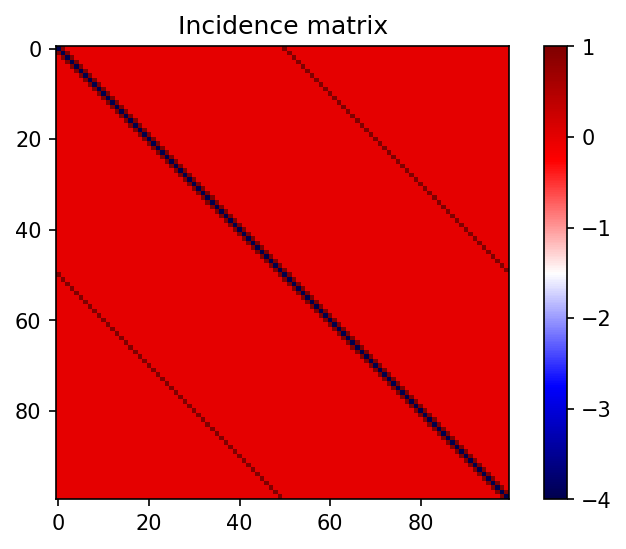

In [4]:
N = Nx*Ny

ind = np.linspace(0,N-1,N)
Ind = np.linspace(0,N-1,N).reshape((Ny,Nx))

Delta2 = np.matrix(np.diagflat(-4.0*np.ones((int(N),1)),k=0) + np.diagflat(np.ones((int(N-1),1)),k=1) \
    + np.diagflat(np.ones((int(N-1),1)),k=-1) + np.diagflat(np.ones((int(N-Nx),1)),k=int(Nx)) \
    + np.diagflat(np.ones((int(N-Ny),1)),k=-(int(Ny))))

plt.figure(3,figsize=(6,4), dpi=150)
plt.title("Incidence matrix")
plt.imshow(Delta2[0:(2*int(Ny)),0:(2*int(Nx))],cmap="seismic")
plt.colorbar()
plt.show()

## Setting up the boundary conditions

In [5]:
NBound = np.array(Ind[0,:])
SBound = np.array(Ind[-1,:])
WBound = np.array(Ind[:,0])
EBound = np.array(Ind[:,-1])

# Now compute the boundary conditions on the North and South side of the domain as the temporal evolution of a !D
# profile in response to a lowering of head on 1-side of the domain

Delta2_1D = np.matrix(np.diagflat(-2.0*np.ones((int(Nx),1)),k=0) + np.diagflat(np.ones((int(Nx-1),1)),k=1) \
    + np.diagflat(np.ones((int(Nx-1),1)),k=-1))

h0_1D = hi*np.ones(shape=(int(Nx),1))

H_1D = np.matrix(np.zeros(shape=(int(Nx),int(Nt))))

H_1D[:,0] = np.matrix(h0_1D)

for i in range(1,int(Nt)):
    hinit_1D = H_1D[:,i-1] + U*dt
        
    hnext_1D = hinit_1D + alpha*Delta2_1D*hinit_1D 
    hnext_1D[0] = hi + U*dt*i

    H_1D[:,i] = hnext_1D[:,0]

## Running the model

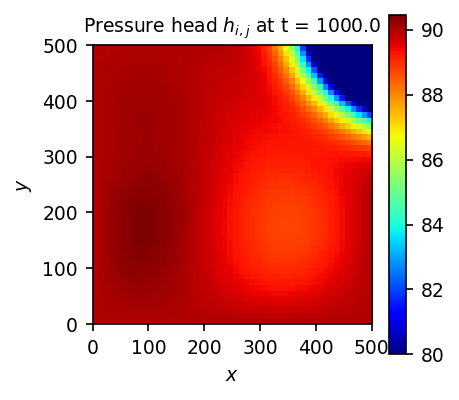

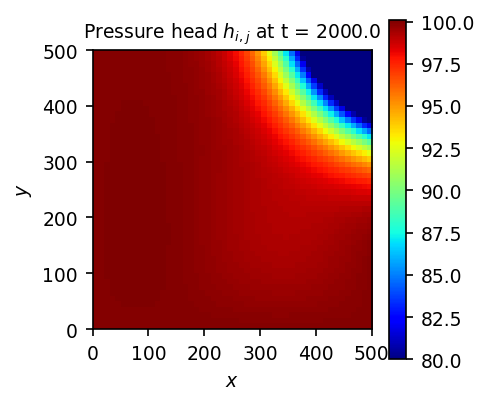

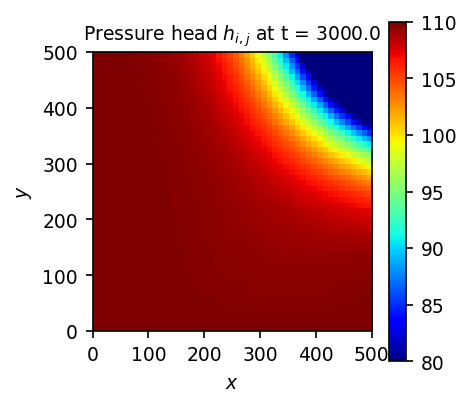

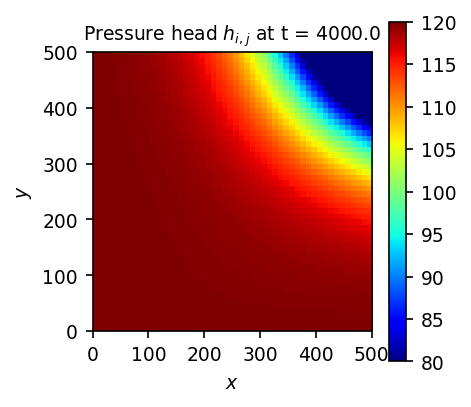

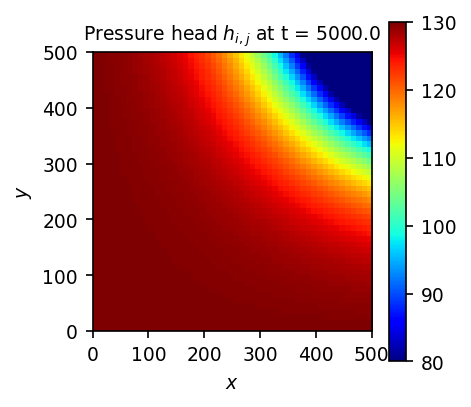

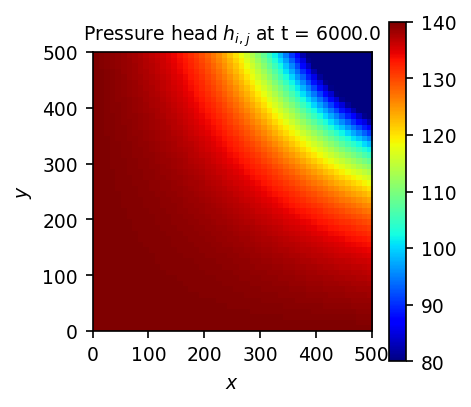

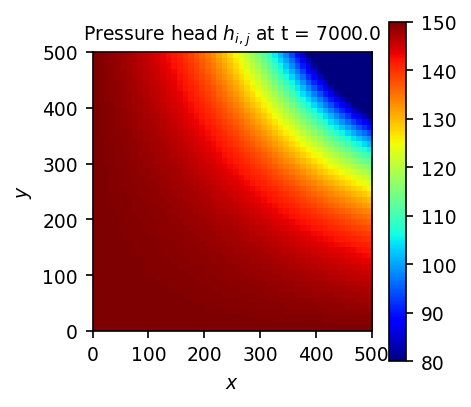

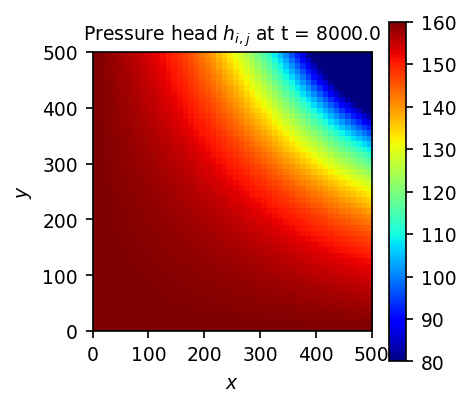

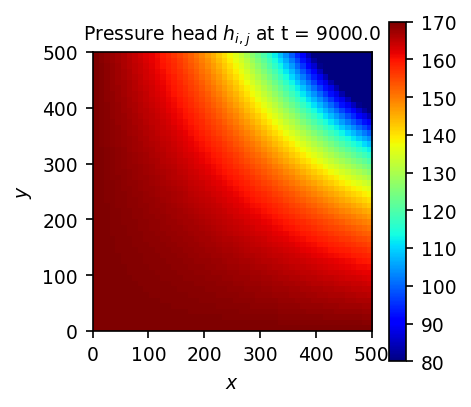

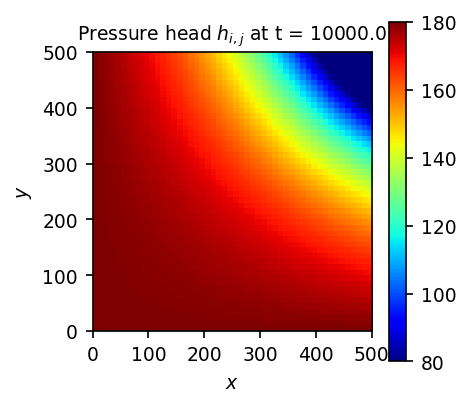

In [9]:
import matplotlib as mpl

h0 = hi*np.ones(shape=(int(N),1)) + 15.0*np.random.randn(N,1)
hnext = np.matrix(h0)

figcounter = 1

for i in range(1,int(Nt)):
    hinit = hnext + U*dt
    
    hnext = hinit + alpha*Delta2*hinit 

    hnext[NBound.astype(int)] = H_1D[:,i]
    hnext[EBound.astype(int)] = np.flipud(H_1D[:,i]) 
    hnext[SBound.astype(int)] = hi + U*dt*i
    hnext[WBound.astype(int)] = hi + U*dt*i
    
    if((i*dt) % OutputInterval == 0):
        H = np.reshape(hnext,(Ny,Nx))
        fig = plt.figure(figcounter, figsize=(3,3), dpi=150)
        plt.title("Pressure head $h_{i,j}$ at t = %s"%(i*dt), fontsize=9)
        plt.xlabel('$x$', fontsize=9)
        plt.ylabel('$y$', fontsize=9)
        plt.xticks(np.arange(xMin,xMax+1.0,(xMax-xMin)/5))
        plt.yticks(np.arange(yMin,yMax+1.0,(yMax-yMin)/5))
        mpl.rcParams['xtick.labelsize'] = 9
        mpl.rcParams['ytick.labelsize'] = 9        
        plt.imshow(H,cmap="jet",extent=[xMin,xMax,yMin,xMax],vmin=hi)
        cb = plt.colorbar()
        cb.ax.tick_params(labelsize=9) 
        plt.show()
        figcounter = figcounter + 1

        